## Additionneur 3 bits

#### 1.Additionneur 1+1 qubits (full adder)

In [1]:
%matplotlib inline
from math import floor
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit import Aer
backend = Aer.get_backend('qasm_simulator')

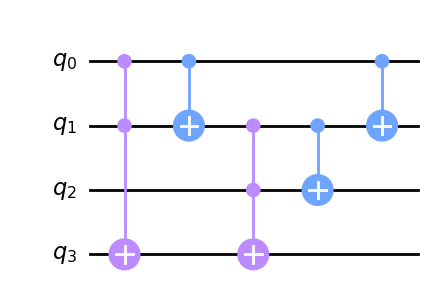

In [2]:
adder = QuantumCircuit(4)

# ici : construisez vous-même votre additionneur quantique 
# 2 qubit avec retenue 
adder.ccx([0],[1],[3])
adder.cx([0],[1])
adder.ccx([1],[2],[3])
adder.cx([1],[2])
adder.cx([0],[1])

adder.draw(output='mpl')

In [4]:
# now let's use the adder in a circuit, and try all possible entries
qr = QuantumRegister(4)
cr = ClassicalRegister(4)

print("            A   B  Carry Retenue Somme")
print("           --- --- ----- ------- -----")

for i in range(8):
    circ = QuantumCircuit(qr,cr)
    if floor((i/2)%2):
        circ.x(qr[0])
    if i%2:
        circ.x(qr[1])
    if i>3:
        circ.x(qr[2])
        
    circ.append(adder,[qr[0],qr[1],qr[2],qr[3]])
    circ.measure(qr,cr)
    
    print(f"données :   {(floor(i/2))%2}   {(i%2)*1}    {(i>3)*1}")
    job = execute(circ,backend, shots=1024)
    result = job.result()
    for x in (result.get_counts(circ)):
        print(f"résultats:  {x[3]}   {x[2]}           {x[0]}      {x[1]}")
    print("           --- --- ----- ------- -----")

            A   B  Carry Retenue Somme
           --- --- ----- ------- -----
données :   0   0    0
résultats:  0   0           0      0
           --- --- ----- ------- -----
données :   0   1    0
résultats:  0   1           0      1
           --- --- ----- ------- -----
données :   1   0    0
résultats:  1   0           0      1
           --- --- ----- ------- -----
données :   1   1    0
résultats:  1   1           1      0
           --- --- ----- ------- -----
données :   0   0    1
résultats:  0   0           0      1
           --- --- ----- ------- -----
données :   0   1    1
résultats:  0   1           1      0
           --- --- ----- ------- -----
données :   1   0    1
résultats:  1   0           1      0
           --- --- ----- ------- -----
données :   1   1    1
résultats:  1   1           1      1
           --- --- ----- ------- -----


#### 2.Additionneur 2+2 qubits (full adder)

In [5]:
%matplotlib inline
from math import floor
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit import Aer
backend = Aer.get_backend('qasm_simulator')

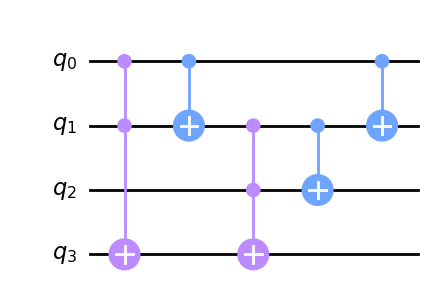

In [6]:
qc = QuantumCircuit(4,name='Adder')

# ici : construisez vous-même votre additionneur quantique 
# 2 qubit avec retenue 
qc.ccx([0],[1],[3])
qc.cx([0],[1])
qc.ccx([1],[2],[3])
qc.cx([1],[2])
qc.cx([0],[1])

adder = qc.to_instruction()

qc.draw(output='mpl')

In [7]:
qc.draw()

q_0: ──■────■──────────────■──
       │  ┌─┴─┐          ┌─┴─┐
q_1: ──■──┤ X ├──■────■──┤ X ├
       │  └───┘  │  ┌─┴─┐└───┘
q_2: ──┼─────────■──┤ X ├─────
     ┌─┴─┐     ┌─┴─┐└───┘     
q_3: ┤ X ├─────┤ X ├──────────
     └───┘     └───┘

In [8]:
dir(qc)

['__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_ancillas',
 '_append',
 '_assign_calibration_parameters',
 '_assign_parameter',
 '_base_name',
 '_calibrations',
 '_check_compatible_regs',
 '_check_dup_param_spec',
 '_check_dups',
 '_clbit_indices',
 '_clbits',
 '_control_flow_scopes',
 '_create_creg',
 '_create_qreg',
 '_data',
 '_global_phase',
 '_increment_instances',
 '_layout',
 '_metadata',
 '_name_update',
 '_parameter_table',
 '_parameters',
 '_peek_previous_instruction_in_scope',
 '_pop_previous_instruction_in_scope',
 '_pop_scope',
 '_push

In [9]:
print(qc.unitary)

<bound method unitary of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f7fd42a80a0>>


In [10]:
help (qc.unitary)

Help on method unitary in module qiskit.extensions.unitary:

unitary(obj, qubits, label=None) method of qiskit.circuit.quantumcircuit.QuantumCircuit instance
    Apply unitary gate to q.



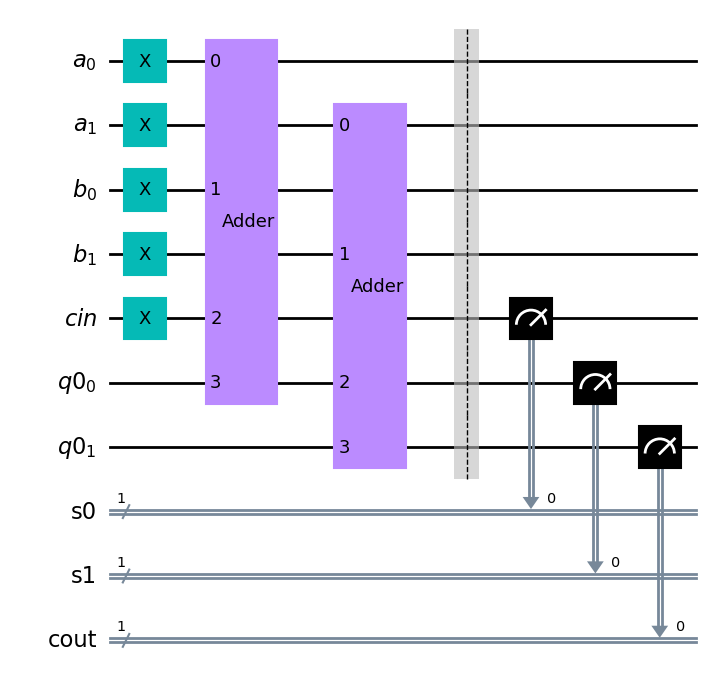

In [9]:
qa = QuantumRegister(2,name='a')
cin = QuantumRegister(1,name='cin')
q0 = QuantumRegister(2,name='q0')
qb = QuantumRegister(2,name='b')
s0 = ClassicalRegister(1,name='s0')
s1 = ClassicalRegister(1,name='s1')
cout = ClassicalRegister(1,name='cout')


adder2 = QuantumCircuit(qa,qb,cin,q0,s0,s1,cout)

#
adder2.x(qa[0])
adder2.x(qa[1])
adder2.x(cin[0])
adder2.x(qb[0])
adder2.x(qb[1])

#


adder2.append(adder,[qa[0],qb[0],cin[0],q0[0]])

adder2.append(adder,[qa[1],qb[1],q0[0],q0[1]])

adder2.barrier()
adder2.measure(cin,s0)
adder2.measure(q0[0],s1)
adder2.measure(q0[1],cout)


adder2.draw(output='mpl')

In [10]:
job = execute(adder2,backend, shots=1024)
my_results = job.result()
print(my_results.get_counts(adder2))

{'1 1 1': 1024}


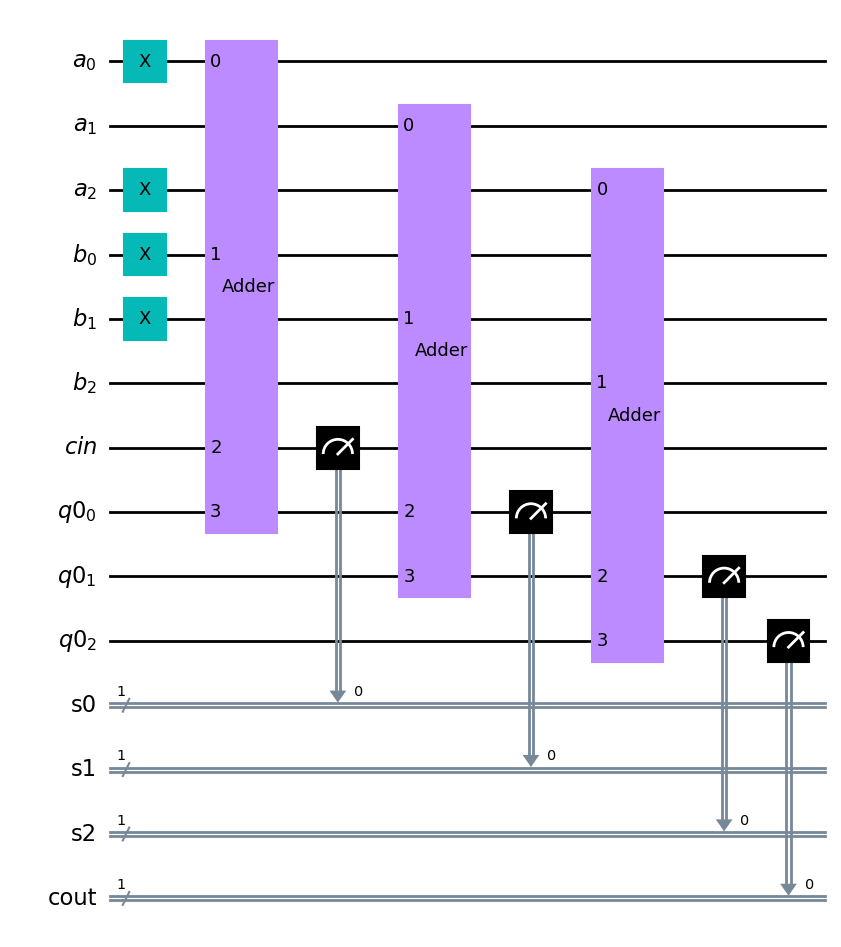

In [11]:
qa = QuantumRegister(3,name='a')
qb = QuantumRegister(3,name='b')
cin = QuantumRegister(1,name='cin')
q0 = QuantumRegister(3,name='q0')
s0 = ClassicalRegister(1,name='s0')
s1 = ClassicalRegister(1,name='s1')
s2 = ClassicalRegister(1,name='s2')

cout = ClassicalRegister(1,name='cout')

adder3 = QuantumCircuit(qa,qb,cin,q0,s0,s1,s2,cout)
# a= 5
adder3.x(qa[0])
adder3.x(qa[2])
# b = 3
adder3.x(qb[0])
adder3.x(qb[1])



adder3.append(adder,[qa[0],qb[0],cin[0],q0[0]])
adder3.measure(cin,s0)
adder3.append(adder,[qa[1],qb[1],q0[0],q0[1]])
adder3.measure(q0[0],s1)
adder3.append(adder,[qa[2],qb[2],q0[1],q0[2]])
adder3.measure(q0[1],s2)
adder3.measure(q0[2],cout)


adder3.draw(output='mpl')

In [13]:
job = execute(adder3,backend, shots=1024)
result = job.result()
d = result.get_counts(adder3)
d

{'1 0 0 0': 1024}

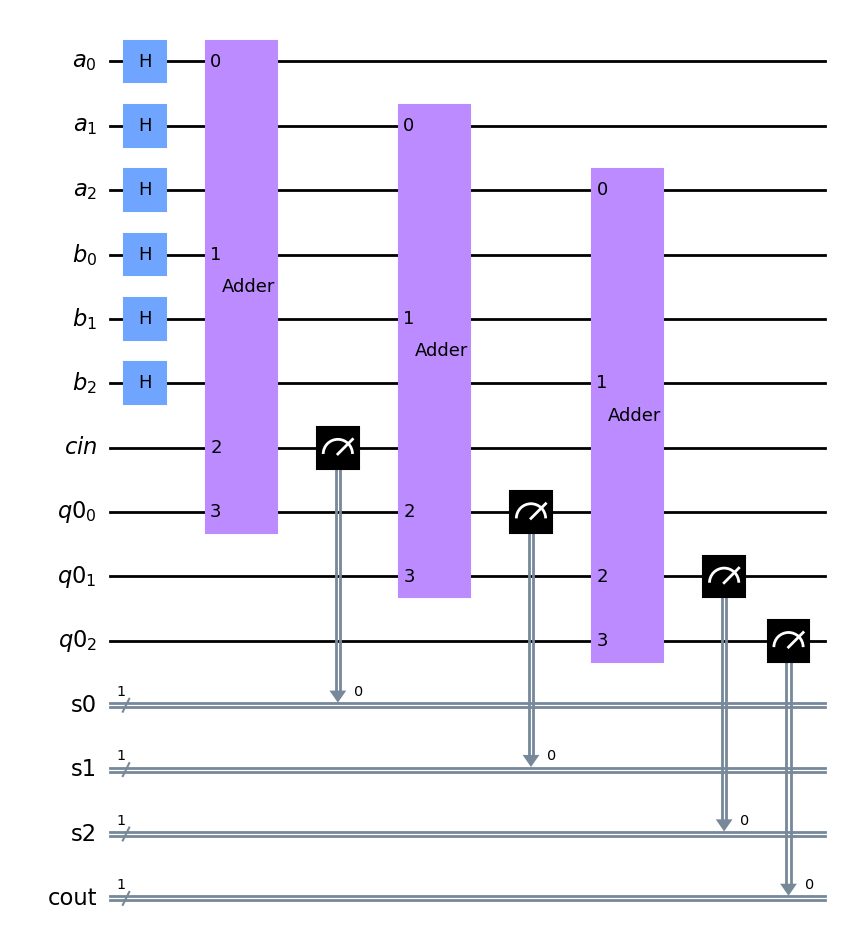

In [17]:
qa = QuantumRegister(3,name='a')
qb = QuantumRegister(3,name='b')
cin = QuantumRegister(1,name='cin')
q0 = QuantumRegister(3,name='q0')
s0 = ClassicalRegister(1,name='s0')
s1 = ClassicalRegister(1,name='s1')
s2 = ClassicalRegister(1,name='s2')

cout = ClassicalRegister(1,name='cout')

adder3 = QuantumCircuit(qa,qb,cin,q0,s0,s1,s2,cout)
# a= 5
adder3.h(qa[0])
adder3.h(qa[1])
adder3.h(qa[2])
# b = 3
adder3.h(qb[0])
adder3.h(qb[1])
adder3.h(qb[2])

#
#adder3.h(cin[0])


adder3.append(adder,[qa[0],qb[0],cin[0],q0[0]])
adder3.measure(cin,s0)
adder3.append(adder,[qa[1],qb[1],q0[0],q0[1]])
adder3.measure(q0[0],s1)
adder3.append(adder,[qa[2],qb[2],q0[1],q0[2]])
adder3.measure(q0[1],s2)
adder3.measure(q0[2],cout)


adder3.draw(output='mpl')

In [18]:
job = execute(adder3,backend, shots=10000)
result = job.result()
d = result.get_counts(adder3)
d

{'1 1 0 1': 341,
 '1 1 1 0': 160,
 '1 0 0 0': 1092,
 '0 0 1 0': 490,
 '1 0 0 1': 896,
 '0 0 0 0': 164,
 '1 0 1 1': 603,
 '0 1 0 1': 954,
 '0 1 1 0': 1096,
 '0 0 1 1': 612,
 '0 0 0 1': 330,
 '0 1 0 0': 796,
 '1 1 0 0': 458,
 '0 1 1 1': 1245,
 '1 0 1 0': 763}

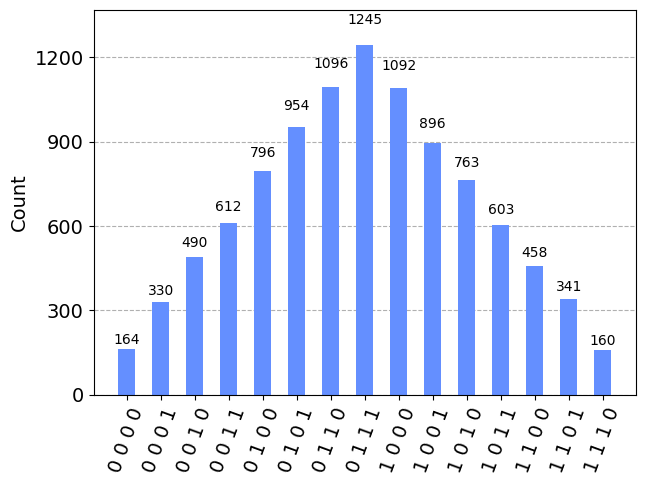

In [19]:

from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(adder3))